### This time, we'll try to slpit the data by classes.

In [2]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score
import time

In [30]:
data = pd.read_csv("train.csv")

print(data[0:5])

y = data.medv
print("__________")
print(y[0:5])

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  
__________
0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64


Let's take a look at y and try to figure, how make classes would be optimal:

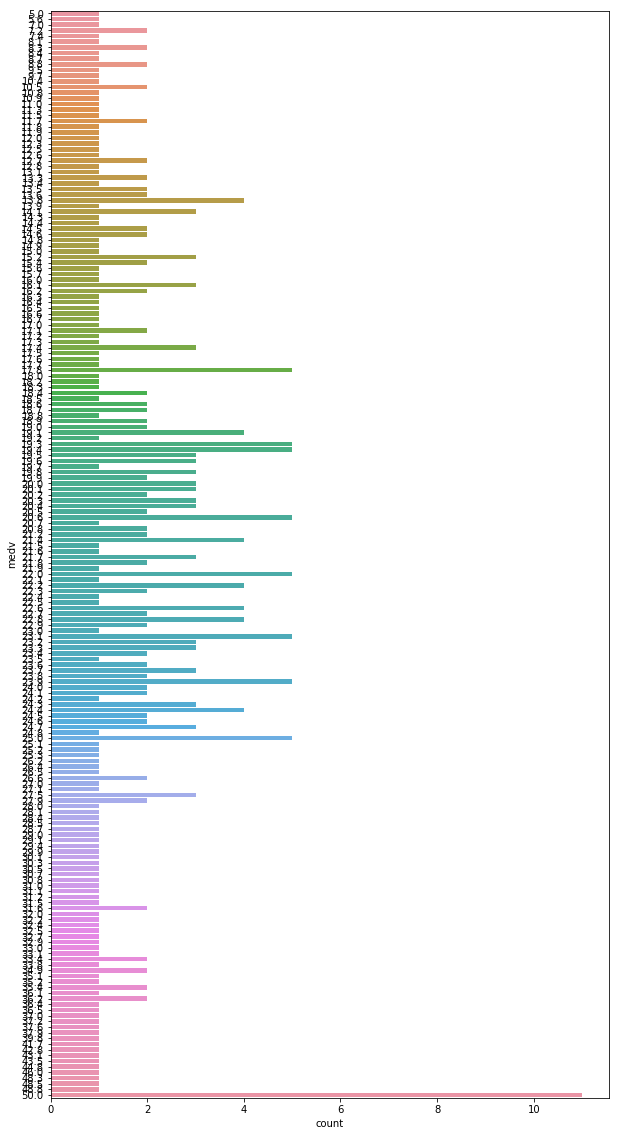

In [23]:
y = data.medv

num_of_classes = list(range(1, len(y) + 1))

fig, ax = plt.subplots(figsize=(10, 20))
#plt.plot(x = num_of_classes, y=y)
sns.countplot(y=y, ax=ax)

### So here I decided to split the data by 10 categories:

1) before 9: Inappropriate-to-live-in houses 

2) 9 - 13.5: extra cheap houses

3) 13.5 - 15: Low-priced housing

4) 15 - 17: Low/middle segment houses

5) 17 - 23: Middle segment

6) 23 - 25: Middle/business class

7) 25 - 30: Business class

8) 30 - 33: Premium class

9) 33 - 45: Premium+ class

10) 45+ : Premium++ class

Se let's split it:

In [31]:
y = data.medv

data['medv'] = np.where(data['medv'].between(0, 9), 0, data['medv'])

data['medv'] = np.where(data['medv'].between(9, 13.5), 1, data['medv'])

data['medv'] = np.where(data['medv'].between(13.5, 15), 2, data['medv'])

data['medv'] = np.where(data['medv'].between(15, 17), 3, data['medv'])

data['medv'] = np.where(data['medv'].between(17, 23), 4, data['medv'])

data['medv'] = np.where(data['medv'].between(23, 25), 5, data['medv'])

data['medv'] = np.where(data['medv'].between(25, 30), 6, data['medv'])

data['medv'] = np.where(data['medv'].between(30, 33), 7, data['medv'])

data['medv'] = np.where(data['medv'].between(33, 45), 8, data['medv'])

data['medv'] = np.where(data['medv'].between(45, 60), 9, data['medv'])
print(data[0: 10])

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
5  11  0.22489  12.5   7.87     0  0.524  6.377  94.3  6.3467    5  311   
6  12  0.11747  12.5   7.87     0  0.524  6.009  82.9  6.2267    5  311   
7  13  0.09378  12.5   7.87     0  0.524  5.889  39.0  5.4509    5  311   
8  14  0.62976   0.0   8.14     0  0.538  5.949  61.8  4.7075    4  307   
9  15  0.63796   0.0   8.14     0  0.538  6.096  84.5  4.4619    4  307   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98   5.0  
1     17.8  396.90   9.14   4.0  
2     18.7  394.63   2.94   8.0  
3     18.7  396.90   5.33   8.0  
4   

Now let's build graphs for boolean/categorial data:

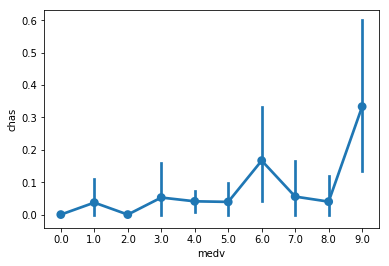

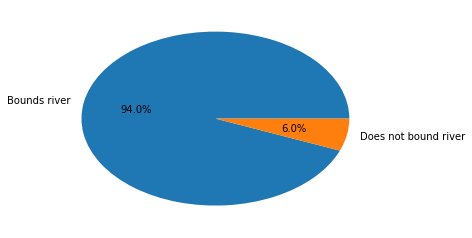

In [32]:
sns.pointplot(x="medv", y="chas", data=data)

labels = ["Bounds river",'Does not bound river']
values=data['chas'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,  autopct='%1.1f%%')
plt.show()

And some plots for numeric data:

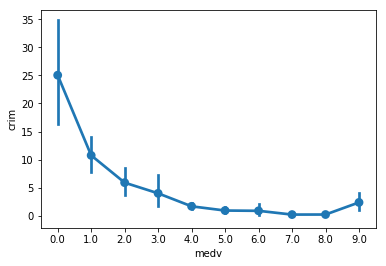

In [33]:
sns.pointplot(x="medv", y="crim", data=data)

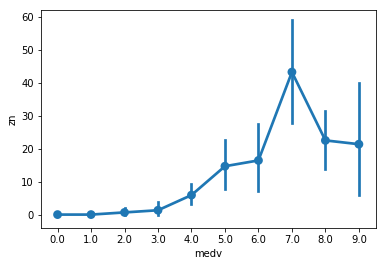

In [34]:
sns.pointplot(x="medv", y="zn", data=data)

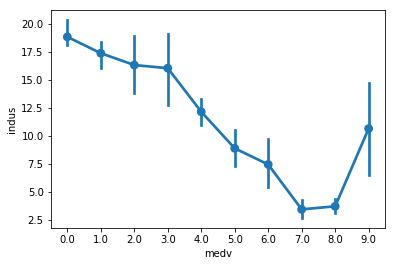

In [35]:
sns.pointplot(x="medv", y="indus", data=data)

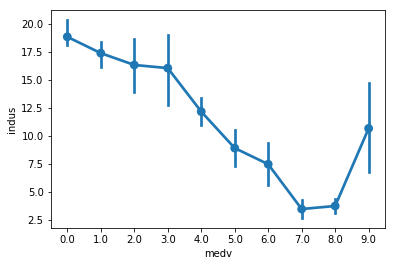

In [36]:
sns.pointplot(x="medv", y="indus", data=data)

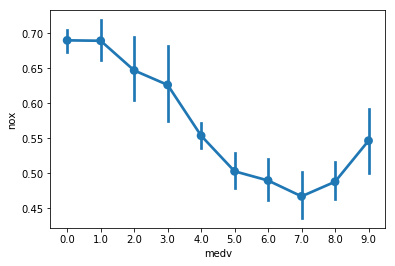

In [37]:
sns.pointplot(x="medv", y="nox", data=data)

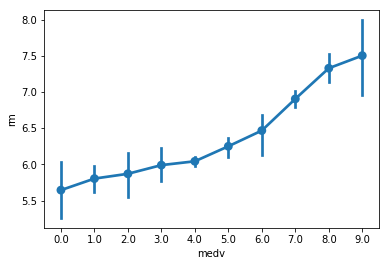

In [38]:
sns.pointplot(x="medv", y="rm", data=data)

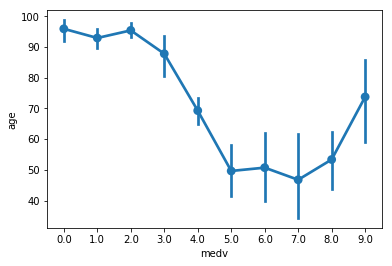

In [39]:
sns.pointplot(x="medv", y="age", data=data)

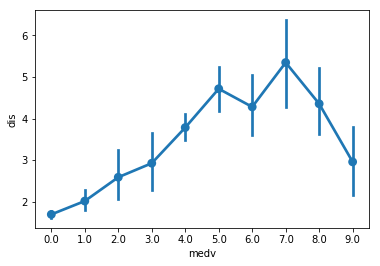

In [40]:
sns.pointplot(x="medv", y="dis", data=data)

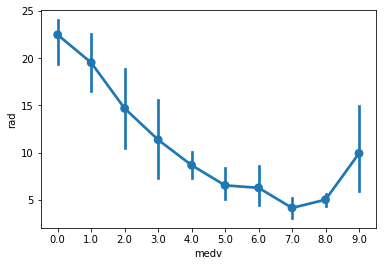

In [41]:
sns.pointplot(x="medv", y="rad", data=data)

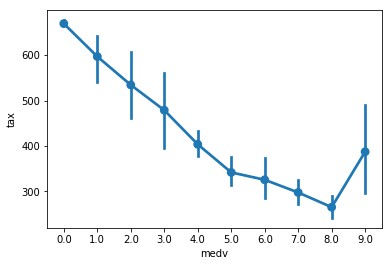

In [42]:
sns.pointplot(x="medv", y="tax", data=data)

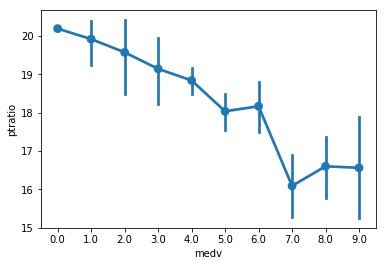

In [43]:
sns.pointplot(x="medv", y="ptratio", data=data)

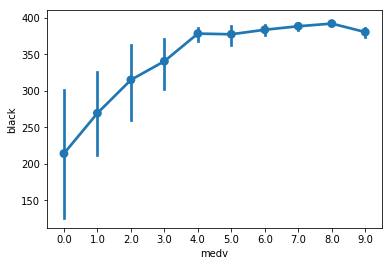

In [46]:
sns.pointplot(x="medv", y="black", data=data)

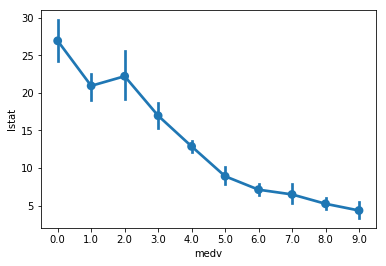

In [46]:
sns.pointplot(x="medv", y="lstat", data=data)

As we can see, the difference between categories is high, so let's try to predict with this data.